In [97]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-data/Iris.csv


# Prediction using Decision Tree Algorithm

# BY -ARJUN AMLA

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [99]:
iris=pd.read_csv('/kaggle/input/iris-data/Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [100]:
iris.shape


(150, 6)

In [101]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [102]:
iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [103]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [104]:
iris=iris.drop('Id',axis=1)

In [105]:
y=iris.pop('Species')
X=iris

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [108]:
dt = DecisionTreeClassifier(random_state=42)

In [109]:
params = {
    "max_depth": [2,3,4,5],
    "min_samples_leaf": [1,2,3,4,5],
    "max_features": [2,3,4,],
    
}

In [110]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=5,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [111]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
CPU times: user 604 ms, sys: 18.9 ms, total: 623 ms
Wall time: 877 ms


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5], 'max_features': [2, 3, 4],
                         'min_samples_leaf': [1, 2, 3, 4, 5]},
             scoring='accuracy', verbose=1)

In [112]:
grid_search.best_score_

0.9583333333333334

In [113]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=3, max_features=3, random_state=42)

In [114]:
from sklearn.metrics import confusion_matrix, accuracy_score
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [115]:
evaluate_model(dt_best)

Train Accuracy : 0.9833333333333333
Train Confusion Matrix:
[[39  0  0]
 [ 0 42  2]
 [ 0  0 37]]
--------------------------------------------------
Test Accuracy : 0.9666666666666667
Test Confusion Matrix:
[[11  0  0]
 [ 0  5  1]
 [ 0  0 13]]


In [116]:
from sklearn.tree import export_graphviz
import graphviz

In [117]:
dot_data= export_graphviz(dt_best, out_file = None, 
                    feature_names = X.columns,  
                      class_names = ['Iris-setosa', 'Iris-versicolor','Iris-virginica'],  
                      filled = True, rounded = True,  
                      special_characters = True, impurity = True)

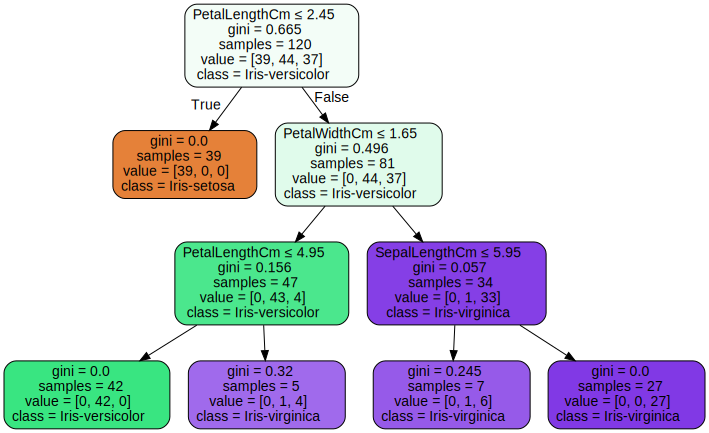

In [118]:
graph = graphviz.Source(dot_data, format='png')
graph